In [56]:
from pathlib import Path
from PIL import Image, ImageDraw, ImageFont
#from torchvision import transforms

from IPython.display import display

import os
import numpy as np
import torch
import subprocess
import json


import gwiko

In [3]:
%%file c_program.c
#include <stdio.h>
int main(void)
{
    printf("Hello World this is C\n");
    return (0);
}

Overwriting c_program.c


Linux : %%bash  
Windows : %%cmd  


In [4]:
%%cmd
echo "Hi there"

Microsoft Windows [Version 10.0.19045.4291]
(c) Microsoft Corporation. All rights reserved.

(learning_FastAI) C:\Users\Cosmos\Documents\GitHub\NodeGWIKO\jupyter_notebooks>echo "Hi there"
"Hi there"

(learning_FastAI) C:\Users\Cosmos\Documents\GitHub\NodeGWIKO\jupyter_notebooks>

To mesure time it take  
%%timeit -n 1 -r 1  

In [5]:
%%timeit -n 1 -r 1
%%cmd
echo "Hi there"

Microsoft Windows [Version 10.0.19045.4291]
(c) Microsoft Corporation. All rights reserved.

(learning_FastAI) C:\Users\Cosmos\Documents\GitHub\NodeGWIKO\jupyter_notebooks>echo "Hi there"
"Hi there"

(learning_FastAI) C:\Users\Cosmos\Documents\GitHub\NodeGWIKO\jupyter_notebooks>15.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


[How to Code in C with a Jupyter Notebook](https://www.youtube.com/watch?v=cWdU9unrlm0)

### Some other magic words 
[Magic words](https://ipython.readthedocs.io/en/stable/interactive/magics.html)

In [52]:
import gwiko
gwiko.reload_lib("gwiko")
gwiko.create_folder_if_not_exists("C:/Users/Cosmos/Desktop/output/tmp/");
gwiko.print_yea()

print(gwiko.encode_to_base64("jea"))

gwiko reloaded successfully.
Folder 'C:/Users/Cosmos/Desktop/output/tmp/' already exists.
yea
amVh


In [53]:
def generate():
    example_shader  = """
void main()
{
    ivec2 pixel_coords = ivec2(gl_GlobalInvocationID.xy);
    vec4 color = vec4(pixel_coords.x / 1024.0, pixel_coords.y / 1024.0, 0.0, 1.0);
    color.g = color.g + float(int_frame) * 0.01;
    imageStore(out0, pixel_coords, color);
}
    """
    return example_shader

print(generate())

gwiko.print_yea()


int_image_width = 1024
int_image_height = 1024
int_local_size_x = 16
int_local_size_y = 16

input_folder_path = 0
output_folder_path = 0
input_images_list = []
number_of_output_images = 1
string_source = gwiko.encode_to_base64(generate())

data = {
    "type": "NodeGWIKO",
    "version" : "0.1",
    "width":int_image_width,
    "height":int_image_height,
    "local_size":{"x":int_local_size_x, "y":int_local_size_y},
    "input_folder": str(input_folder_path) + "\\",
    "output_folder": str(output_folder_path) + "\\",
    "images_input": input_images_list,
    "num_images_out":number_of_output_images,
    "source" : string_source,
}

file_path = "C:/Users/Cosmos/Desktop/output/tmp/out.json"
gwiko.save_json(data, file_path);


void main()
{
    ivec2 pixel_coords = ivec2(gl_GlobalInvocationID.xy);
    vec4 color = vec4(pixel_coords.x / 1024.0, pixel_coords.y / 1024.0, 0.0, 1.0);
    color.g = color.g + float(int_frame) * 0.01;
    imageStore(out0, pixel_coords, color);
}
    
yea
JSON data saved to: C:/Users/Cosmos/Desktop/output/tmp/out.json


Folder 'C:\Users\Cosmos\Desktop\output\tmp' already exists.
Folder 'C:\Users\Cosmos\Desktop\output\tmp\output' already exists.
Folder 'C:\Users\Cosmos\Desktop\output\tmp\input' already exists.
C:\Users\Cosmos\Desktop\output\tmp\input/program.json
JSON data saved to: C:\Users\Cosmos\Desktop\output\tmp\input/program.json
File C:\Users\Cosmos\Desktop\output\tmp\output\out_0.png deleted successfully.
File C:\Users\Cosmos\Desktop\output\tmp\output\generated_shader.glsl.png does not exist.
File C:\Users\Cosmos\Desktop\output\tmp\output\log.txt deleted successfully.
Image loaded successfully.
#version 430
layout (local_size_x = 16, local_size_y = 16) in;
layout (binding = 0, rgba32f) uniform image2D out0;
int int_frame = 0;

void main()
{
    ivec2 pixel_coords = ivec2(gl_GlobalInvocationID.xy);
    vec4 color = vec4(pixel_coords.x / 1024.0, pixel_coords.y / 1024.0, 0.0, 1.0);
    color.g = color.g + float(int_frame) * 0.01;
    imageStore(out0, pixel_coords, color);
}
    

width : 1024
heig

ValueError: Could not save to JPEG for display

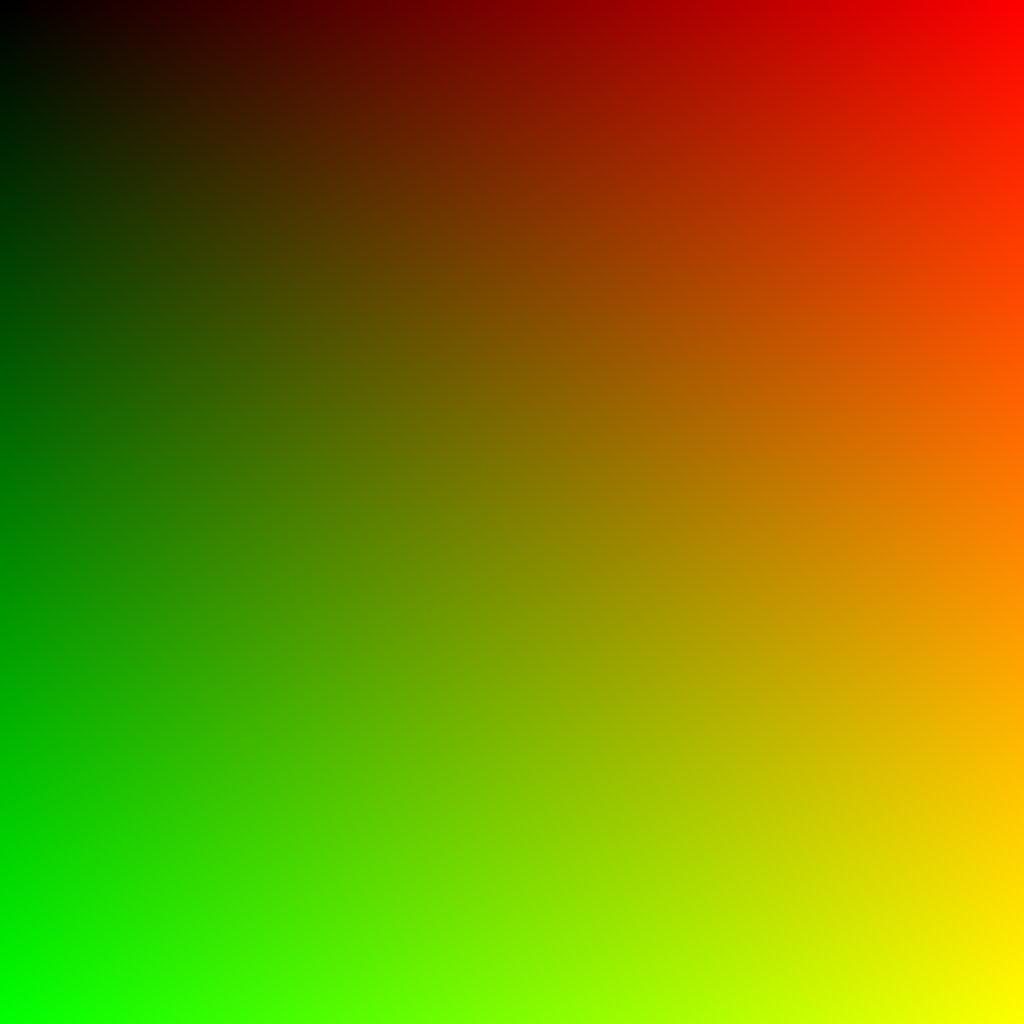

In [58]:
#tmp_folder_path = Path.cwd().joinpath("ComfyUI").joinpath("custom_nodes").joinpath("NodeGWIKO").joinpath("tmp")
tmp_folder_path = Path("C:/Users/Cosmos/Desktop/output/tmp/")
gwiko.create_folder_if_not_exists(tmp_folder_path)

#output_folder_path = Path.cwd().joinpath("ComfyUI").joinpath("custom_nodes").joinpath("NodeGWIKO").joinpath("tmp").joinpath("output")
output_folder_path = Path("C:/Users/Cosmos/Desktop/output/tmp/output")
gwiko.create_folder_if_not_exists(output_folder_path)

#input_folder_path = Path.cwd().joinpath("ComfyUI").joinpath("custom_nodes").joinpath("NodeGWIKO").joinpath("tmp").joinpath("input")
input_folder_path = Path("C:/Users/Cosmos/Desktop/output/tmp/input")
gwiko.create_folder_if_not_exists(input_folder_path)

input_images_list = []

number_of_output_images = 1

int_frame = 0

string_glsl_source  = generate()
string_source = "int int_frame = " +  str(int_frame) + ";\n" + string_glsl_source
string_source = gwiko.encode_to_base64(string_source)

int_image_width = 1024
int_image_height = 1024
int_local_size_x = 16
int_local_size_y = 16

#input_folder_path = 0
#output_folder_path = 0
input_images_list = []
number_of_output_images = 1
#string_source = gwiko.encode_to_base64(generate())

data = {
    "type": "NodeGWIKO",
    "version" : "0.1",
    "width":int_image_width,
    "height":int_image_height,
    "local_size":{"x":int_local_size_x, "y":int_local_size_y},
    "input_folder": str(input_folder_path) + "\\",
    "output_folder": str(output_folder_path) + "\\",
    "images_input": input_images_list,
    "num_images_out":number_of_output_images,
    "source" : string_source,
}

path_to_program = str(input_folder_path) + "/program.json"
print(path_to_program)
gwiko.save_json(data, path_to_program);

gwiko.delete_file_if_exists(str(output_folder_path) + "\\out_0.png")
gwiko.delete_file_if_exists(str(output_folder_path) + "\\generated_shader.glsl.png")
gwiko.delete_file_if_exists(str(output_folder_path) + "\\log.txt")

exe_file_name = "NodeGWIKO4.exe";
#command = str(Path.cwd().joinpath("ComfyUI").joinpath("custom_nodes").joinpath("NodeGWIKO")) + "\\" + exe_file_name
command = str(Path.cwd().parent) + "\\" + exe_file_name

args = ["ComfyUI", gwiko.replace_slash(path_to_program)]
print_to_screen = True
gwiko.start_process_with_args(command, args, print_to_screen)

image_out_0_pil_image = gwiko.load_image(str(output_folder_path) + "\\out_0.png")
image_out_0 = gwiko.pil2tensor(image_out_0_pil_image)

if print_to_screen:
    string_of_glsl_code = gwiko.read_string_from_file(str(output_folder_path) + "\\generated_shader.glsl")
    print(string_of_glsl_code)
    logging_txt = gwiko.read_string_from_file(str(output_folder_path) + "\\log.txt")
    print(logging_txt)
    print(image_out_0)
    display(image_out_0_pil_image)